<a href="https://colab.research.google.com/github/kartikgandhi/Computer-Vision/blob/main/Connected_Component_Labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
def connected_component_label(path):
    
    # Getting the input image
    img = cv2.imread(path, 0)
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()

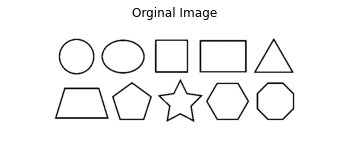

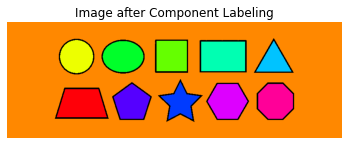

In [20]:
connected_component_label('/content/gdrive/MyDrive/image.png')
